In [ ]:
#Problem Statement: MNIST Handwritten Digit Classification
#t is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

#The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Load Data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Train & Test dataset
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
#Train & Test labels
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


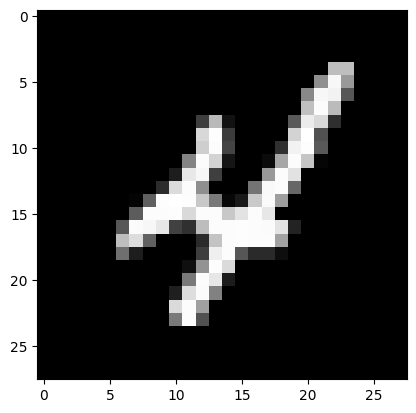

In [8]:
#Data Visualization
import numpy as np
plt.imshow(X_train[9], cmap="gray");

In [10]:
#classes to categories
#Preparing the labels
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [13]:
y_train[0]

5

In [12]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
X_train.shape

(60000, 28, 28)

In [18]:
#Normalise the images
train_images = X_train.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = X_test.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [19]:
train_images.shape

(60000, 784)

In [20]:
#Keras Model
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [21]:
#Compilation
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Fit the model
#import tensorflow as tf
#tf.config.run_functions_eagerly(True)
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0288 - accuracy: 0.9915
Epoch 2/5
469/469 [==============================] - 18s 39ms/step - loss: 0.0222 - accuracy: 0.9936
Epoch 3/5
469/469 [==============================] - 18s 39ms/step - loss: 0.0171 - accuracy: 0.9952
Epoch 4/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0130 - accuracy: 0.9965
Epoch 5/5
469/469 [==============================] - 18s 39ms/step - loss: 0.0095 - accuracy: 0.9977


In [25]:
#Model Validation
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('train_acc:', train_acc)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

1875/1875 [==============================] - 29s 16ms/step - loss: 0.0281 - accuracy: 0.9925
train_acc: 0.9925166964530945
313/313 [==============================] - 4s 13ms/step - loss: 0.0658 - accuracy: 0.9794
test_acc: 0.9793999791145325


In [ ]:
#train accuracy is higher than test accuracy. It is good, and means that our model is performing well, and doesn't overfit.

In [26]:
#Model Prediction
# Predict labels on test data
y_pred = network.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

# print vector of probabilities
print(f"What Softmax predicted: {y_pred}")

# print predicted number
print(f"What Softmax actually means: {y_pred_classes}")

313/313 [==============================] - 1s 4ms/step
What Softmax predicted: [[2.0817449e-08 1.8325085e-10 3.5781700e-06 ... 9.9999326e-01
  8.2697662e-09 1.3584759e-07]
 [8.3544691e-09 2.7403532e-05 9.9997169e-01 ... 6.4920730e-13
  5.8271394e-07 4.6666982e-14]
 [5.0235570e-07 9.9894041e-01 1.9723547e-04 ... 6.3101202e-04
  1.5438358e-04 2.1626759e-06]
 ...
 [6.0754933e-13 1.4451731e-11 7.6681890e-12 ... 2.6359630e-06
  1.1996364e-07 9.7348232e-07]
 [4.5221011e-08 2.6433427e-09 4.9112275e-10 ... 1.1451318e-08
  3.5027824e-05 4.6205048e-10]
 [8.2103625e-08 6.9414600e-12 5.6190828e-08 ... 4.3884891e-13
  1.1435686e-09 3.0899798e-09]]
What Softmax actually means: [7 2 1 ... 4 5 6]


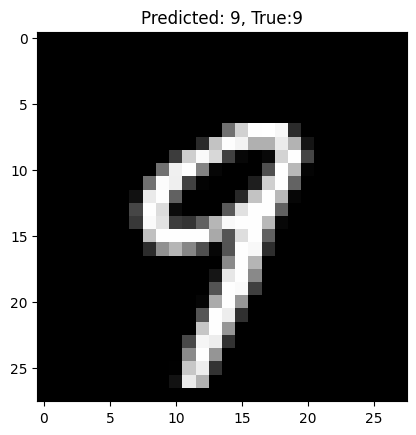

In [39]:
# visualize
#Check prediction randomly
# choose a random sample from all the test data
random_num = np.random.choice(len(test_images))
X_sample = test_images[random_num]

# save true label of this sample in a variable
y_true = np.argmax(test_labels, axis=1)
y_sample_true = y_true[random_num]

# save a predicted label of this sample in a variable
y_sample_pred_class = y_pred_classes[random_num]
plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray");